In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\train_ctrUa4K.csv")
pd.set_option('display.max_columns', None)
df.shape
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [155]:
df['Loan_ID'].nunique()
((df.isnull().sum()*100)/df.shape[0]).sort_values(ascending=False).head(8)


Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
Loan_Status         0.000000
dtype: float64

In [282]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
print(df["Gender"].value_counts())
print(df["Married"].value_counts())
print(df["Dependents"].value_counts())
print(df["Self_Employed"].value_counts())
print(df["LoanAmount"].value_counts())
print(df["Loan_Amount_Term"].value_counts())
print(df["Credit_History"].value_counts())


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [283]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])


In [284]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [285]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [286]:
df.drop(["Loan_ID"], axis = 1, inplace = True)

In [287]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [288]:
print(df.select_dtypes(['object']).columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [289]:
cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']
for colname in cat_cols:
            df[colname] = df[colname].astype('category')

In [290]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [291]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Self_Employed','Property_Area','Dependents']
encoder = LabelEncoder()
for column in cols:
    df[column] = encoder.fit_transform(df[column])
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,128.0,360.0,1.0,2,Y
1,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,2,Y


In [183]:
df["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [292]:
df.replace({"Graduate": 1, "Not Graduate": 0}, inplace = True)

In [293]:
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [200]:
mapp = {'Y':1,'N':0}#converting output to numeric
df["Loan_Status"] = df["Loan_Status"].map(mapp)

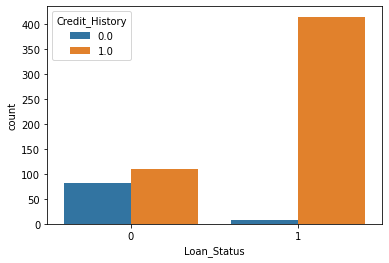

In [201]:
sns.countplot(x='Loan_Status',data=df,hue='Credit_History')

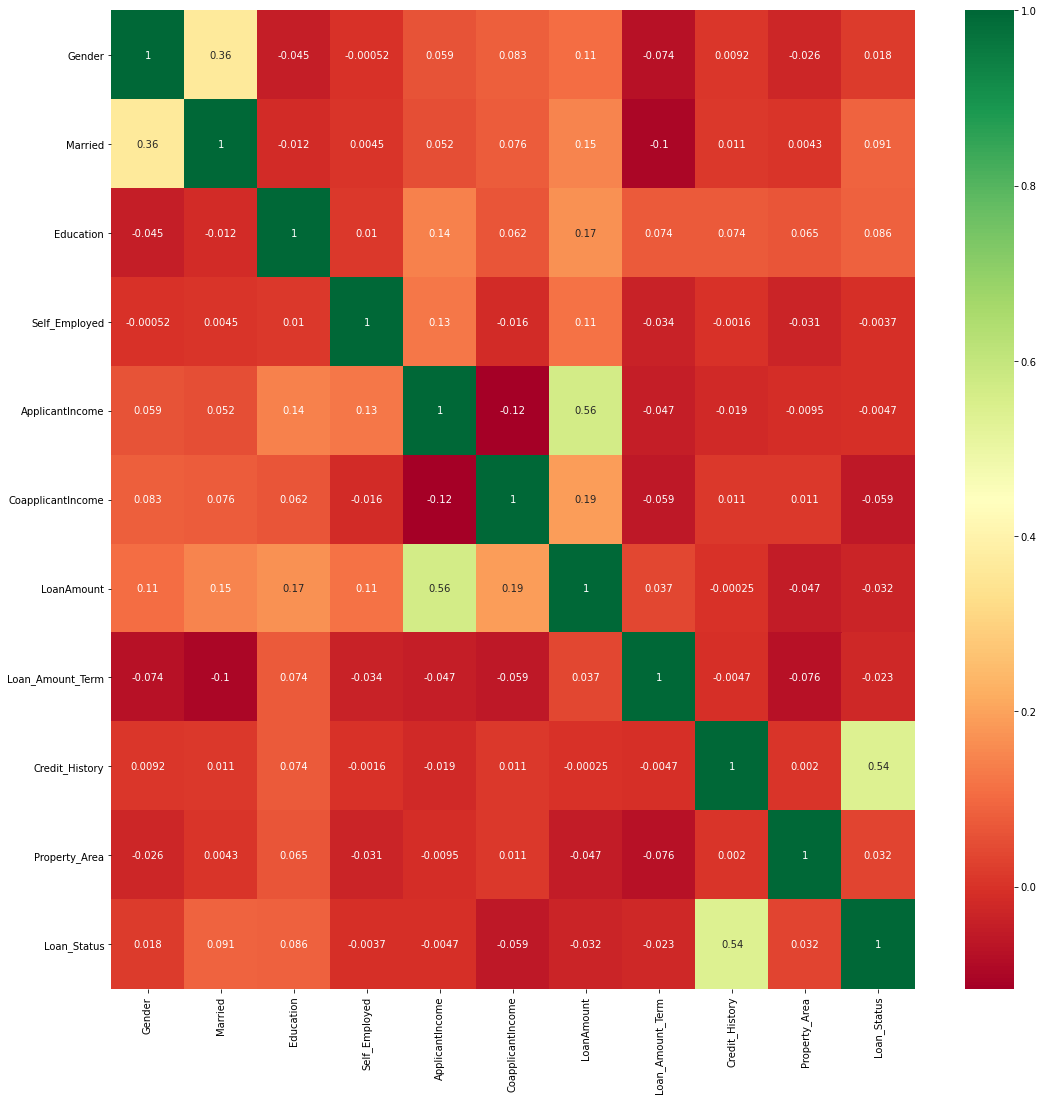

In [91]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [294]:
df.shape

(614, 12)

In [295]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

Text(0, 0.5, 'Frequency')

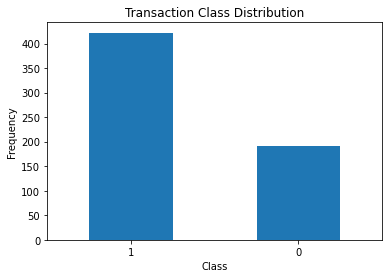

In [296]:
count_classes = pd.value_counts(df['Loan_Status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost

classifier=xgboost.XGBClassifier()
cv = cross_val_score(classifier,X_train,y_train,cv=5, scoring = 'accuracy')
print(cv)
print(cv.mean())

[0.7979798  0.73469388 0.76530612 0.76530612 0.78571429]
0.7698000412286127


In [299]:
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
y_predict = xg_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.49      0.58        43
           1       0.76      0.89      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.74      0.75      0.73       123



In [300]:
#for test data
test_data=pd.read_csv(r"C:\Users\ADMIN\Downloads\test_lAUu6dG.csv")
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [301]:
#checking for null data
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [99]:
print(test_data["Gender"].value_counts())
print(test_data["Dependents"].value_counts())
print(test_data["Self_Employed"].value_counts())
print(test_data["LoanAmount"].value_counts())
print(test_data["Loan_Amount_Term"].value_counts())
print(test_data["Credit_History"].value_counts())


Male      286
Female     70
Name: Gender, dtype: int64
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64
No     307
Yes     37
Name: Self_Employed, dtype: int64
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
186.0     1
163.0     1
360.0     1
77.0      1
297.0     1
Name: LoanAmount, Length: 144, dtype: int64
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    279
0.0     59
Name: Credit_History, dtype: int64


In [302]:
#filling null values
test_data["Gender"]=test_data["Gender"].fillna(test_data["Gender"].mode()[0])
test_data["Self_Employed"]=test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0])
test_data["Dependents"]=test_data["Dependents"].fillna(test_data["Dependents"].mode()[0])
test_data["LoanAmount"]=test_data["LoanAmount"].fillna(test_data["LoanAmount"].median())
test_data["Loan_Amount_Term"]=test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mode()[0])
test_data["Credit_History"]=test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0])

In [303]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [304]:
test_data.drop(["Loan_ID"], axis = 1, inplace = True)

In [305]:
print(test_data.select_dtypes(['object']).columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [306]:
cats_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area']
for colname in cats_cols:
            test_data[colname] = test_data[colname].astype('category')

In [307]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Self_Employed','Property_Area','Dependents']
encoder = LabelEncoder()
for column in cols:
    test_data[column] = encoder.fit_transform(test_data[column])
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,Graduate,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,2


In [308]:
test_data.replace({"Graduate": 1, "Not Graduate": 0}, inplace = True)

In [309]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


In [310]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [311]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
xg_model=XGBClassifier()
random_search=RandomizedSearchCV(xg_model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [312]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.1s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [313]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [314]:
xg_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [315]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [317]:
y_predictt=xg_model.predict(X_test)

In [321]:
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_predictt))
print(accuracy_score(y_test,y_predictt))

              precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.77      0.96      0.86        80

    accuracy                           0.79       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.79      0.77       123

0.7886178861788617


In [322]:
y_predict=xg_model.predict(test_data)

In [323]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [324]:
# Submission
submission_file = pd.read_csv(r"C:\Users\ADMIN\Downloads\sample_submission_49d68Cx.csv")
submission_file

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [325]:
submission_file = submission_file[['Loan_ID']]
submission_file['Loan_Status'] = y_predict
submission_file.head(8)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0


In [326]:
maps={1:'Y',0:'N'}
submission_file["Loan_Status"]=submission_file["Loan_Status"].map(maps)

In [327]:
submission_file.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [328]:
submission_file.to_csv("sumbit", index=False)